## Analysis of Human Study

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import os, sys, warnings
warnings.filterwarnings("ignore")
sys.path.append("/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate")
from tqdm import tqdm
import json
import functions.software_commands as software_commands
import functions.statistics as statistics
import defaults

### Opinion Scores

In [2]:
# Opinion_scores
df = pd.read_csv("/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate/dataset/human_study/opinion_scores.csv")
opinion_scores = df.to_numpy()
mean_opinion_scores = np.mean(opinion_scores, axis=0)

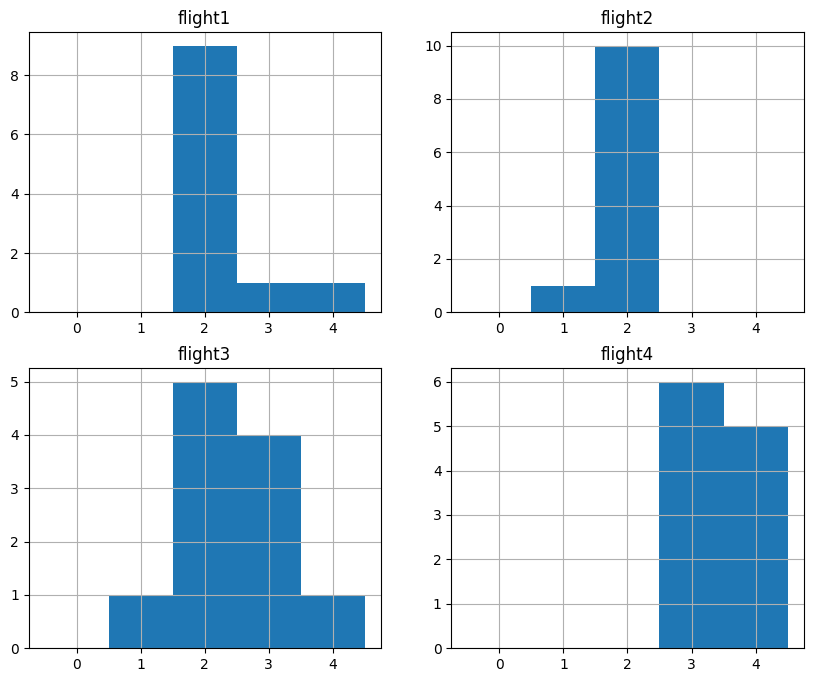

In [3]:
# Histogram of Scores
plt.figure(figsize=(10,8))

for i in range(opinion_scores.shape[1]):
    plt.subplot(2,2, i+1)
    plt.grid()
    plt.title("flight{}".format(i+1))

    plt.hist(opinion_scores[:,i], bins=np.arange(-0.5,5.5,1))

plt.show()

In [4]:
# normalized Scores
normalized_scores = (opinion_scores - np.mean(opinion_scores, axis=1, keepdims=True))/np.std(opinion_scores, axis=1, keepdims=True)

# MOS scores
mos_scores = 5*np.mean((normalized_scores - np.min(normalized_scores))/(np.max(normalized_scores) - np.min(normalized_scores)), axis=0)

### Loading Quality Scores

In [5]:
# Loading Metadata
streamed_videos_dir = "/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate/dataset/human_study/streamed_videos"
steamed_videos_quality_scores_dir = "/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate/dataset/human_study/streamed_videos_quality_scores"

# Metadata
predicted_scores = []
for i in range(4):
    # File-Details
    resolution, fps, b, q = statistics.get_statistics(
        video_path=os.path.join(streamed_videos_dir, "flight{}.mp4".format(i+1)),
        quality_dir=steamed_videos_quality_scores_dir
    )
    predicted_scores.append(q)

In [6]:
print (mos_scores)
print (predicted_scores)
print (mean_opinion_scores)
print ()

[1.33065578 0.85771317 2.37632768 4.18530337]
[3.611202938361286, 3.656530581082708, 3.970316515841888, 3.699920028875726]
[2.27272727 1.90909091 2.45454545 3.45454545]



PearsonRResult(statistic=0.25877112614063535, pvalue=0.7412288738593646)
SignificanceResult(statistic=0.6000000000000001, pvalue=0.3999999999999999)


Text(0, 0.5, 'Predicted Score')

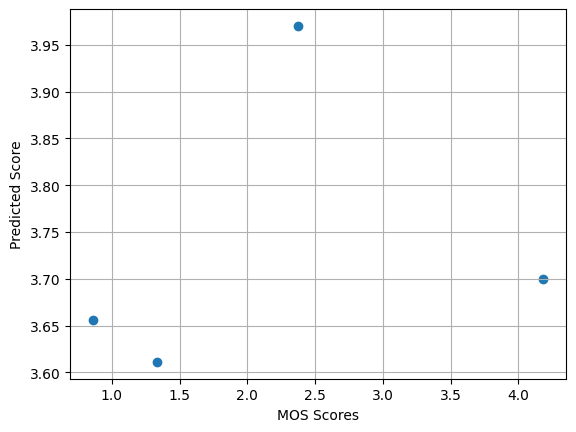

In [7]:
print (stats.pearsonr(mos_scores, predicted_scores))
print (stats.spearmanr(mos_scores, predicted_scores))
plt.scatter(mos_scores, predicted_scores)
plt.grid()
plt.xlabel("MOS Scores")
plt.ylabel("Predicted Score")

PearsonRResult(statistic=0.09487914962369473, pvalue=0.9051208503763053)
SignificanceResult(statistic=0.6000000000000001, pvalue=0.3999999999999999)


Text(0, 0.5, 'Predicted Score')

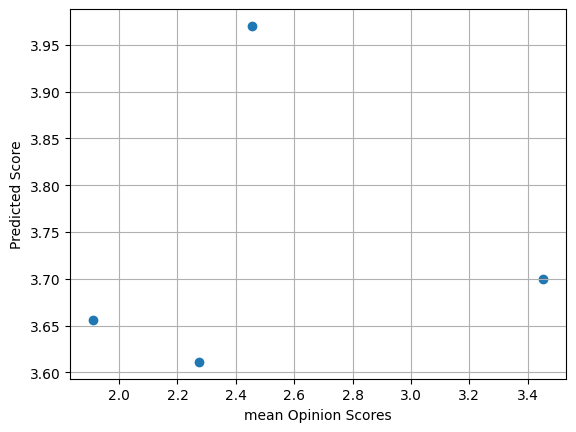

In [8]:
print (stats.pearsonr(mean_opinion_scores, predicted_scores))
print (stats.spearmanr(mean_opinion_scores, predicted_scores))
plt.scatter(mean_opinion_scores, predicted_scores)
plt.grid()
plt.xlabel("mean Opinion Scores")
plt.ylabel("Predicted Score")